# Forecast the PlasticSales data set
#dataset:PlasticSales.csv

In [1]:
#Importing necessaries lib.& load data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
plastic = pd.read_csv("C:\\Users\\Raja\\Downloads\\assignments\\forecasting\\PlasticSales.csv")

In [2]:
#Showing 5 top most records
plastic

,Month,Sales
0,Jan-49,742
1,Feb-49,697
2,Mar-49,776
3,Apr-49,898
4,May-49,1030
5,Jun-49,1107
6,Jul-49,1165
7,Aug-49,1216
8,Sep-49,1208
9,Oct-49,1131


In [3]:
# Shape of plastic dataframe
plastic.shape

(60, 2)

In [4]:
# Show the type of dataframe
type(plastic)

pandas.core.frame.DataFrame

In [5]:
#Loading data with replacing index cols with Months cols
plastic = pd.read_csv("C:\\Users\\Raja\\Downloads\\assignments\\forecasting\\PlasticSales.csv", index_col=[0], parse_dates=True,squeeze=True)

In [6]:
#Top 5 records
plastic

Month
2049-01-01     742
2049-02-01     697
2049-03-01     776
2049-04-01     898
2049-05-01    1030
2049-06-01    1107
2049-07-01    1165
2049-08-01    1216
2049-09-01    1208
2049-10-01    1131
2049-11-01     971
2049-12-01     783
2050-01-01     741
2050-02-01     700
2050-03-01     774
2050-04-01     932
2050-05-01    1099
2050-06-01    1223
2050-07-01    1290
2050-08-01    1349
2050-09-01    1341
2050-10-01    1296
2050-11-01    1066
2050-12-01     901
2051-01-01     896
2051-02-01     793
2051-03-01     885
2051-04-01    1055
2051-05-01    1204
2051-06-01    1326
2051-07-01    1303
2051-08-01    1436
2051-09-01    1473
2051-10-01    1453
2051-11-01    1170
2051-12-01    1023
2052-01-01     951
2052-02-01     861
2052-03-01     938
2052-04-01    1109
2052-05-01    1274
2052-06-01    1422
2052-07-01    1486
2052-08-01    1555
2052-09-01    1604
2052-10-01    1600
2052-11-01    1403
2052-12-01    1209
2053-01-01    1030
2053-02-01    1032
2053-03-01    1126
2053-04-01    1285
2053-0

In [7]:
#Size of df
plastic.size

60

In [8]:
#Type of new data frame i.e make dataframe->dataseries
type(plastic)

pandas.core.series.Series

In [9]:
#Showing general statistical description
plastic.describe()

count      60.000000
mean     1162.366667
std       266.431469
min       697.000000
25%       947.750000
50%      1148.000000
75%      1362.500000
max      1637.000000
Name: Sales, dtype: float64

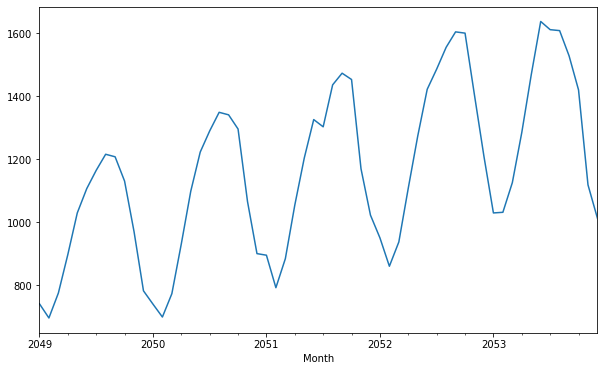

In [10]:
#TimeSeries plot
plastic.plot()

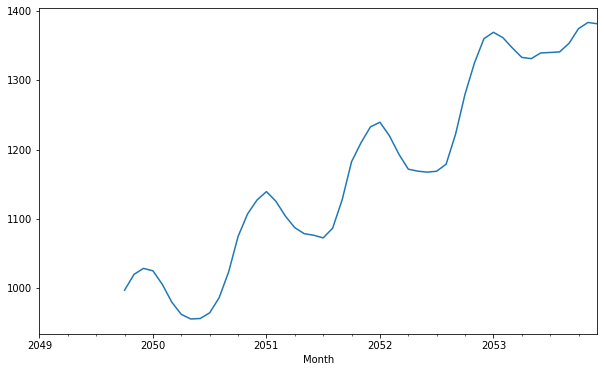

In [11]:
#Creating Moving average #1st analysis of timeseries
plastic_MA=plastic.rolling(window=10).mean()
plastic_MA.plot()

In [12]:
#Naive or base model is created
plastic_base=pd.concat([plastic, plastic.shift(1)],axis=1)
plastic_base.head()

,Sales,Sales
Month,,
2049-01-01,742,NaN
2049-02-01,697,742.0
2049-03-01,776,697.0
2049-04-01,898,776.0
2049-05-01,1030,898.0


In [13]:
#Renaiming Sales cols with actual & forecast sales
plastic_base.columns=['actual_sales',  'forecast_sales']

In [14]:
#Top 5 most records
plastic_base.head()

,actual_sales,forecast_sales
Month,,
2049-01-01,742,NaN
2049-02-01,697,742.0
2049-03-01,776,697.0
2049-04-01,898,776.0
2049-05-01,1030,898.0


In [15]:
#Drop NaN value records
plastic_base.dropna(inplace=True)

In [16]:
#Show records of data
plastic_base.head()

,actual_sales,forecast_sales
Month,,
2049-02-01,697,742.0
2049-03-01,776,697.0
2049-04-01,898,776.0
2049-05-01,1030,898.0
2049-06-01,1107,1030.0


In [17]:
#Import sklearn libraies & numpy
from sklearn.metrics import mean_squared_error
import numpy as np

In [18]:
#Finding MSE 
plastic_error=mean_squared_error(plastic_base.actual_sales,plastic_base.forecast_sales)
plastic_error

15722.152542372882

In [19]:
#Finding RMSE
np.sqrt(plastic_error)

125.38800796875626

In [20]:
#Import ACF, PACF timeseriasplots lib.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

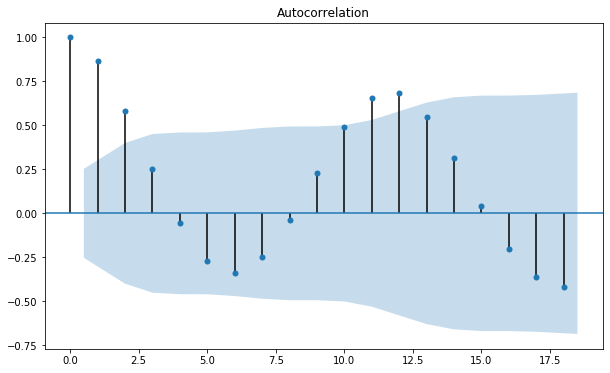

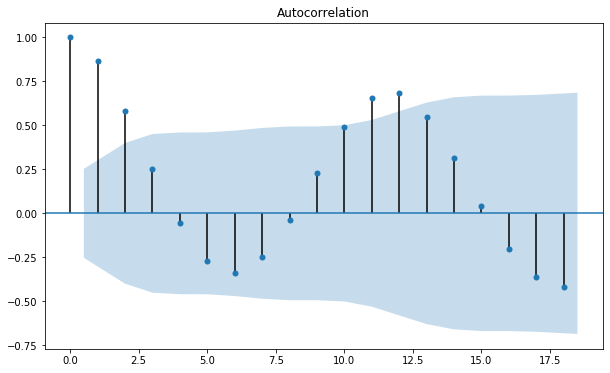

In [21]:
#ACF plot of data
plot_acf(plastic)

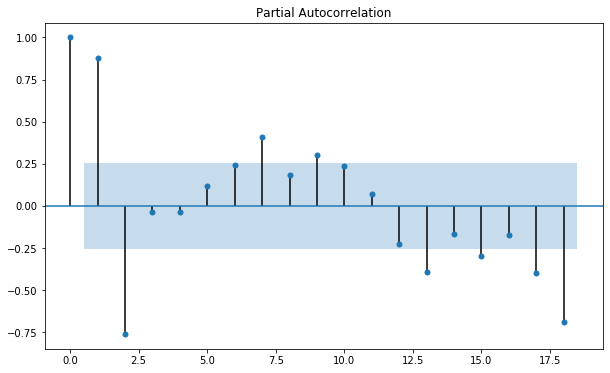

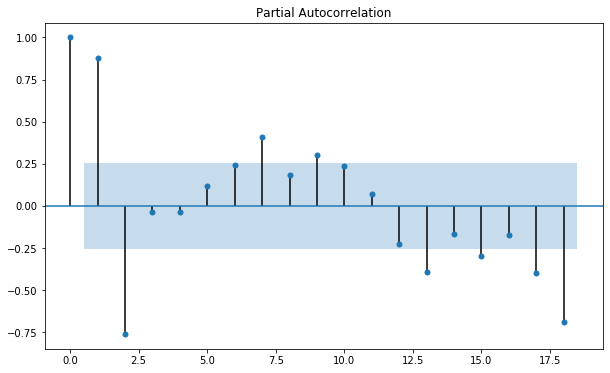

In [22]:
#Plot PACF (q->2, p->2, d->0-2)
plot_pacf(plastic)

In [23]:
#Importing ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [24]:
#Dividing data into train & test with below slicing
plastic_train=plastic[0:50]
plastic_test=plastic[50:60]

In [25]:
#Restrict showing warnings
import warnings
warnings.filterwarnings('ignore')

In [26]:
#Trining ARIMA model with given order p,d,q
plastic_model=ARIMA(plastic_train, order=(1,0,1)) #2,1,2

In [27]:
#Fitting model
plastic_model_fit=plastic_model.fit()

In [28]:
#The Akaike Information Critera (AIC)
plastic_model_fit.aic

604.0837796444443

In [29]:
#Forecast data
plastic_forecast=plastic_model_fit.forecast(steps=10)[0]
plastic_forecast

array([1083.38476719, 1084.18730938, 1084.84647612, 1085.38788166,
       1085.83256423, 1086.19780354, 1086.49779227, 1086.74418752,
       1086.94656387, 1087.11278535])

#### 10 Forecasted values of quarters

In [30]:
#RMSE error
np.sqrt(mean_squared_error(plastic_test,plastic_forecast))

367.94109287621785

In [31]:
#Testing p,d,q values on this range for Auto finding corect or best order
p_values=range(0,5)
d_values=range(0,3)
q_values=range(0,5)

In [34]:
#Finding MSE using ARIMA model with loop functions
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            train,test=plastic[0:50],plastic[50:60]
            predictions=list()
            for i in range(len(test)):
                try:
                    model=ARIMA(train,order)
                    model_fit=model.fit(disp=0)
                    pred_y=model_fit.forecast()[0]
                    predictions.append(pred_y)
                    error=mean_squared_error(test,predictions)
                    print('ARIMA%s MSE=%.2f'%(order,error))
                except:
                    continue

ARIMA(0, 0, 1) MSE=99001.70
ARIMA(0, 0, 4) MSE=98004.70
ARIMA(0, 1, 1) MSE=138011.40
ARIMA(0, 1, 2) MSE=155464.27
ARIMA(0, 1, 3) MSE=143862.01
ARIMA(0, 1, 4) MSE=76540.17
ARIMA(0, 2, 1) MSE=167331.45
ARIMA(0, 2, 2) MSE=165091.03
ARIMA(0, 2, 3) MSE=162060.86
ARIMA(0, 2, 4) MSE=146281.74
ARIMA(1, 0, 0) MSE=167589.20
ARIMA(1, 0, 1) MSE=136769.74
ARIMA(1, 0, 2) MSE=155015.50
ARIMA(1, 0, 3) MSE=132737.62
ARIMA(1, 0, 4) MSE=96861.89
ARIMA(1, 1, 0) MSE=168174.57
ARIMA(1, 2, 0) MSE=167284.99
ARIMA(1, 2, 1) MSE=166940.33
ARIMA(1, 2, 2) MSE=160274.35
ARIMA(1, 2, 3) MSE=155645.02
ARIMA(1, 2, 4) MSE=139342.70
ARIMA(2, 0, 0) MSE=156097.47
ARIMA(2, 0, 1) MSE=174998.98
ARIMA(2, 0, 2) MSE=175180.47
ARIMA(2, 0, 3) MSE=210112.41
ARIMA(2, 0, 4) MSE=205830.97
ARIMA(2, 1, 0) MSE=141697.33
ARIMA(2, 1, 2) MSE=144342.14
ARIMA(2, 2, 0) MSE=166674.28
ARIMA(2, 2, 1) MSE=167061.93
ARIMA(2, 2, 2) MSE=129865.01
ARIMA(2, 2, 4) MSE=104094.22
ARIMA(3, 0, 0) MSE=174731.53
ARIMA(3, 0, 1) MSE=175076.72
ARIMA(3, 0, 2) MSE

#Various methods of Data Transformation to achieve Stationarity has not applied as: log10 , loge , cube, cube root, exponential decay
#Not checked seperately AR & MA Model

### I prefer model: ARIMA(0, 1, 4) MSE=76540.17, RMSE=276.65-->This is very less than base model.